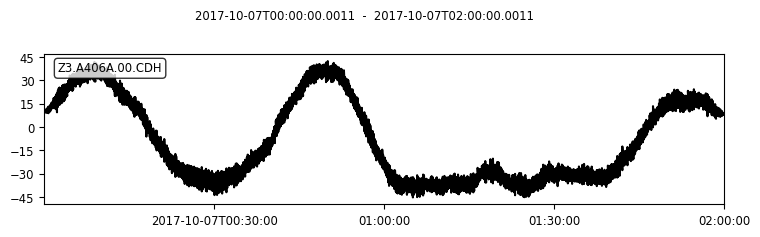

Text(0, 0.5, '$f$ (Hz)')

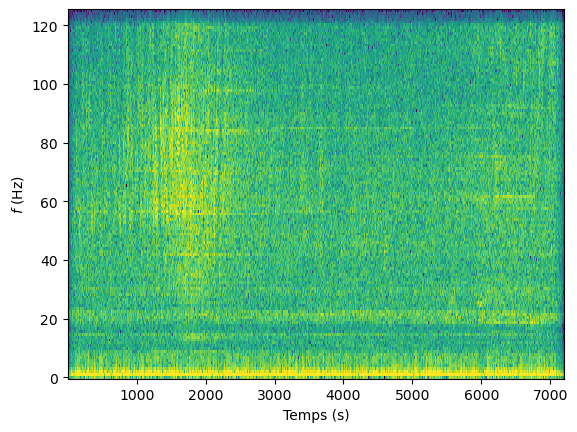

In [6]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

client = Client("EIDA")
t = UTCDateTime("2017-10-07T00:00:00")# on rentre la date et l'heure du debut de l'enregistrement
chnl = "CDH"

signal_brut = client.get_waveforms("Z3", "A406A", "*", chnl, t, t + 2*60*60)

inv = client.get_stations(network="Z3", station="A406A", channel=chnl,
    level="response",format="xml")

signaltr = signal_brut[0].copy()
signaltr=signaltr.remove_response(inventory=inv) 
signaltr.plot()
sgnl=signaltr[:]

f, t, spec = signal.spectrogram(sgnl,fs=250)

plt.figure()
plt.pcolormesh(t,f,20*np.log10(abs(spec)))
plt.clim([-160,-20])
plt.xlabel('Temps (s)')
plt.ylabel('$f$ (Hz)')


In [13]:
def load_stream(db,fn, client, inventory, station, channel, min_duration=1,
                max_duration=86400, nb_channels=4, ttol=1e-4):
    starttime = UTCDateTime(db)
    endtime = UTCDateTime(fn)
    duration = endtime - starttime
    if duration > max_duration:
        return None
    st = client.get_waveforms(
        'Z3', station.code, '*', channel,
        starttime=starttime,
        endtime=endtime) 
    st.merge(1)
    st.trim(starttime, endtime)
    starttime = min([tr.stats.starttime for tr in st])
    endtime = max([tr.stats.endtime for tr in st])
    duration = endtime - starttime
    st.trim(starttime, endtime)
    for tr in st:
        tr.stats.starttime = starttime
    st.attach_response(inventory)
    return st

In [14]:
deb = "2017-10-07T00:00:00"
fin = "2017-10-07T01:00:00"

invLA34 = client.get_stations(network='Z3', station='A406A', level='response',format="xml")
stationLA34 = invLA34[0][0]

st = load_stream(deb,fin, client, invLA34, stationLA34,'*')

In [15]:
st

4 Trace(s) in Stream:
Z3.A406A.00.CDH | 2017-10-07T00:00:00.001100Z - 2017-10-07T01:00:00.001100Z | 250.0 Hz, 900001 samples
Z3.A406A.00.CH1 | 2017-10-07T00:00:00.001100Z - 2017-10-07T01:00:00.001100Z | 250.0 Hz, 900001 samples
Z3.A406A.00.CH2 | 2017-10-07T00:00:00.001100Z - 2017-10-07T01:00:00.001100Z | 250.0 Hz, 900001 samples
Z3.A406A.00.CHZ | 2017-10-07T00:00:00.001100Z - 2017-10-07T01:00:00.001100Z | 250.0 Hz, 900001 samples

In [17]:
st.trace('CDH')

AttributeError: 'Stream' object has no attribute 'trace'